# Create CSV for each dataset

## JobAds

### Create csv dataset

In [2]:
import json


import pandas as pd
#pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8
df_job = pd.read_json('./../data/Dataset_jobAds_XMLC-BERT/mycareersfuture_list.json')

df_job.head()

,company_name,job_title,employment_type,seniority,job_category,location,salary,min_experience,skills_required,requirements_and_role,job_requirements,company_info,posting_date,expiry_date,no_of_applications,job_id
0,THE SUPREME HR ADVISORY PTE. LTD.,Admin Assistant [$1.5k-$2.2k / Bukit Batuk ...,"Permanent, Full Time",Junior Executive,"[Admin , Secretarial]","AZ @ PAYA LEBAR, 140 PAYA LEBAR ROAD 409015","$1,800to$2,200Monthly",1 year exp,"[Access, Customer Service, Data Entry, Employe...",providing support director admin manager assis...,requirements preferably least 1 year relevant exp,THE SUPREME HR ADVISORY PTE. LTD.\nHere at The...,09 May 2019,08 Jun 2019,7,JOB-2019-0098255
1,GOOGLE ASIA PACIFIC PTE. LTD.,"Visual Designer, Google Pay - Singapore",Full Time,Executive,[Design],"MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...","$6,700to$13,400Monthly",5 years exp,"[Adobe Creative Suite, Advertising, Art Direct...",company overview google conventional company i...,requirementsminimum qualifications ba bs degre...,GOOGLE ASIA PACIFIC PTE. LTD.\n,09 May 2019,08 Jun 2019,43,JOB-2019-0098355
2,BBDO SINGAPORE PTE LTD,IT Manager,"Permanent, Full Time","Manager, Professional",[Information Technology],"SINGAPORE LAND TOWER, 50 RAFFLES PLACE 048623","$5,000to$7,000Monthly",5 years exp,"[Active Directory, Business Analysis, Change M...",manager manager job involves vast array duties...,requirements 5 years management experience mul...,BBDO's mantra is “The Work. The Work. The W...,09 May 2019,08 Jun 2019,37,JOB-2019-0098419
3,AMARIS CONSULTING PTE. LTD.,Active Directory Consultant,"Permanent, Full Time",Non-executive,[Information Technology],"ROBINSON 112, 112 ROBINSON ROAD 068902","$5,000to$7,000Monthly",4 years exp,"[Analysis, Business Analysis, Business Develop...",undertaking various active directory projects ...,requirements university degree computer scienc...,AMARIS CONSULTING PTE. LTD.,08 May 2019,07 Jun 2019,0,JOB-2019-0097764
4,HITACHI CONSULTING SINGAPORE PTE. LTD.,Senior Consultant (SAP HCM),Permanent,Senior Executive,[Information Technology],"PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...","$6,000to$9,000Monthly",8 years exp,"[Analysis, Business Analysis, Business Develop...",provide l2 support sap hcm related issues trou...,requirementsmust skills possess degree equival...,No information added.,08 May 2019,07 Jun 2019,3,JOB-2019-0098085


In [4]:
SE_dataset_jobAds = df_job[['skills_required','requirements_and_role','job_requirements']]


#SE_dataset_jobAds['text'] = df_job['requirements_and_role'] + ' '+ df_job['job_requirements']  # have to choose why this order ? cause (tocheck if in paper like that) like the paper???
#SE_dataset_jobAds['text'] =df_job['job_requirements'] + ' '+  df_job['requirements_and_role'] #OTHER ORDER

SE_dataset_jobAds['text'] = SE_dataset_jobAds[["requirements_and_role", "job_requirements"]].apply(" ".join, axis=1)

SE_dataset_jobAds.head()
SE_dataset_jobAds['text'][3]

C:\Users\Andru\AppData\Local\Temp\ipykernel_15936\4082791192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SE_dataset_jobAds['text'] = SE_dataset_jobAds[["requirements_and_role", "job_requirements"]].apply(" ".join, axis=1)


"undertaking various active directory projects 2019 address variety issues needs ensure communicate project task progress updates report risk issues manager stakeholders sponsors timely manner meeting management appropriate staff understand requirements working close collaboration global team local team make sure stability platform hardware working remediation issues related platform provide technical support projects achieve delivery set within defined timeframe conduct situational data analysis identify understand problem issue arrange provide training people affected change per requirement ensure security risk management directives policies applied operational products services integrated planning development implementation new products services requirements university degree computer science equivalent proven experience working active directory windows system 4 years direct experience managing supporting large windows environment deep knowledge microsoft product windows os windows 

In [5]:
SE_dataset_jobAds[['text', 'skills_required']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20298 entries, 0 to 20297
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             20298 non-null  object
 1   skills_required  20298 non-null  object
dtypes: object(2)
memory usage: 317.3+ KB


In [6]:
print("PREPROCESSED:\n",df_job.loc[df_job['job_id']=="JOB-2019-0115309"]['requirements_and_role'].values[0])

print("RAW TEXT:\n",df_job.loc[df_job['job_id']=="JOB-2019-0115309"]['company_info'].values[0])
#["requirements_and_role", "job_requirements"]
#Text is already preprocessed: but company info is not
#   - lower case
#   - remove punctuation
#   - remove stop words
#   - remove special characters
#   - remove extra spaces ???
#   - remove accents ???


PREPROCESSED:
 required conduct research composite high thermal panel system candidate must graduate phd degree reputable university relevant research experience expertise strong journal publication record work researchers pi group needs strong analytical experimental skills relevant composite high thermal prior relevant experience similar project strong record journal publication ip generation favourably reviewed candidate relevant experiment skills based material synthesis mechanical testing thermal electrical testing material chemical micro structural analysis
RAW TEXT:
 World's Top Young University
A research-intensive public university, Nanyang Technological University, Singapore (NTU Singapore) has 33,000 undergraduate and postgraduate students in the colleges of Engineering, Business, Science, and Humanities, Arts and Social Sciences, and its Interdisciplinary Graduate School. NTU’s Lee Kong Chian School of Medicine was established jointly with Imperial College London.
Meteoric 

In [7]:
SE_dataset_jobAds[['text', 'skills_required']].to_csv('jobads_dataset.csv')
#SE_dataset_jobAds[['text', 'skills_required']].to_json('jobads_dataset.json', orient='records')

### jobads Data Analysis

In [8]:
job_categories_all = np.concatenate(df_job["job_category"],axis=None)
print('len(job_categories_all):',len(job_categories_all))

job_categories_unique = np.unique(job_categories_all)
print("len(job_categories_unique):",len(job_categories_unique))
print("job_categories_unique:",job_categories_unique)

job_categories_counts = pd.Series(job_categories_all).value_counts().sort_values(ascending=False)
print("job_categories_counts:",job_categories_counts)

len(job_categories_all): 31315
len(job_categories_unique): 1040
job_categories_unique: [' Auditing ' ' Beauty' ' Beauty, Others' ... 'Telecommunications, Others'
 'Travel ' 'not_available']
job_categories_counts: Information Technology                                                            3583
Engineering                                                                       1481
 Retail                                                                           1277
Accounting                                                                        1187
 Auditing                                                                         1187
                                                                                  ... 
Customer Service, Human Resources                                                    1
 Promotions, Human Resources, Marketing                                              1
 Taxation, Consulting, General Management, General Work, Professional Services       1
 Tax

job_categories_ktop: Information Technology                    3583
Engineering                               1481
 Retail                                   1277
Accounting                                1187
 Auditing                                 1187
Admin                                     1043
 Taxation                                  900
Banking and Finance                        882
F&B                                        772
Sales                                      745
 Laboratory                                741
 R&D                                       718
Building and Construction                  691
 Secretarial                               684
Others                                     638
 Public Relations                          596
Healthcare                                 564
 Civil Service                             557
 Supply Chain                              556
Marketing                                  530
Sciences                               

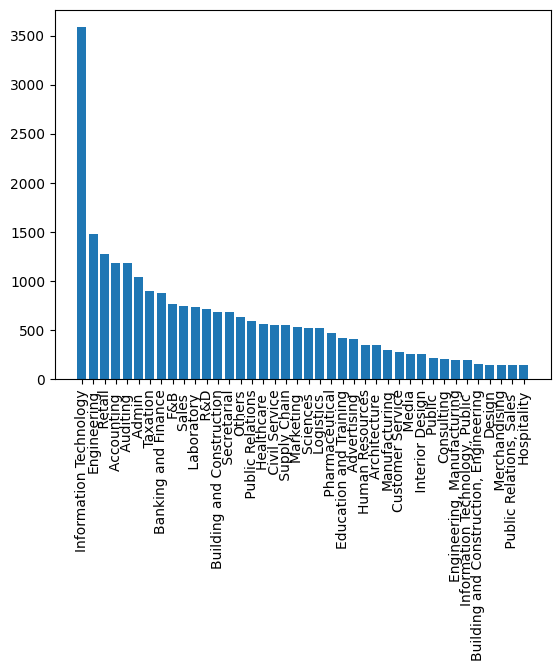

In [9]:
job_categories_ktop = job_categories_counts.head(40)

print("job_categories_ktop:",job_categories_ktop)

plot = plt.bar(job_categories_ktop.index, job_categories_ktop.values)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
import re

website_html_list = """<div class=" css-1d2x8h4"><div class=" css-1czi51j-option" aria-disabled="false" id="react-select-category-option-0" tabindex="-1">Accounting / Auditing / Taxation</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-1" tabindex="-1">Admin / Secretarial</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-2" tabindex="-1">Advertising / Media</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-3" tabindex="-1">Architecture / Interior Design</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-4" tabindex="-1">Banking and Finance</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-5" tabindex="-1">Building and Construction</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-6" tabindex="-1">Consulting</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-7" tabindex="-1">Customer Service</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-8" tabindex="-1">Design</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-9" tabindex="-1">Education and Training</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-10" tabindex="-1">Engineering</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-11" tabindex="-1">Entertainment</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-12" tabindex="-1">Environment / Health</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-13" tabindex="-1">Events / Promotions</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-14" tabindex="-1">F&amp;B</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-15" tabindex="-1">General Management</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-16" tabindex="-1">General Work</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-17" tabindex="-1">Healthcare / Pharmaceutical</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-18" tabindex="-1">Hospitality</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-19" tabindex="-1">Human Resources</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-20" tabindex="-1">Information Technology</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-21" tabindex="-1">Insurance</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-22" tabindex="-1">Legal</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-23" tabindex="-1">Logistics / Supply Chain</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-24" tabindex="-1">Manufacturing</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-25" tabindex="-1">Marketing / Public Relations</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-26" tabindex="-1">Medical / Therapy Services</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-27" tabindex="-1">Others</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-28" tabindex="-1">Personal Care / Beauty</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-29" tabindex="-1">Precision Engineering</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-30" tabindex="-1">Professional Services</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-31" tabindex="-1">Public / Civil Service</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-32" tabindex="-1">Purchasing / Merchandising</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-33" tabindex="-1">Real Estate / Property Management</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-34" tabindex="-1">Repair and Maintenance</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-35" tabindex="-1">Risk Management</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-36" tabindex="-1">Sales / Retail</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-37" tabindex="-1">Sciences / Laboratory / R&amp;D</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-38" tabindex="-1">Security and Investigation</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-39" tabindex="-1">Social Services</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-40" tabindex="-1">Telecommunications</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-41" tabindex="-1">Travel / Tourism</div><div class=" css-f85sjx-option" aria-disabled="false" id="react-select-category-option-42" tabindex="-1">Wholesale Trade</div></div>"""


# TOFIND example: tabindex="-1">Accounting / Auditing / Taxation</div><div class=" css
x = re .findall("tabindex=\"-1\">\w+[\s/\s\w+]*</div><div class=",website_html_list)
print("regex result:",x)

# remove extra characters from pattern
x = [string.replace("tabindex=\"-1\">",'') for string in x]
print(x)
job_cat_website = [string.replace("</div><div class=",'') for string in x]


print("job_cat_website size:",len(job_cat_website)," : ",job_cat_website)

categories_list = []
for cat in job_cat_website:

    #z = re.findall("[A-Z][a-z]+",cat)
    z = cat.split(' / ')
    categories_list.append(z)
    if z:
        print(z)

"""
[Marketing , Public Relations, Sales , Retail]
"""


regex result: ['tabindex="-1">Accounting / Auditing / Taxation</div><div class=', 'tabindex="-1">Admin / Secretarial</div><div class=', 'tabindex="-1">Advertising / Media</div><div class=', 'tabindex="-1">Architecture / Interior Design</div><div class=', 'tabindex="-1">Banking and Finance</div><div class=', 'tabindex="-1">Building and Construction</div><div class=', 'tabindex="-1">Consulting</div><div class=', 'tabindex="-1">Customer Service</div><div class=', 'tabindex="-1">Design</div><div class=', 'tabindex="-1">Education and Training</div><div class=', 'tabindex="-1">Engineering</div><div class=', 'tabindex="-1">Entertainment</div><div class=', 'tabindex="-1">Environment / Health</div><div class=', 'tabindex="-1">Events / Promotions</div><div class=', 'tabindex="-1">General Management</div><div class=', 'tabindex="-1">General Work</div><div class=', 'tabindex="-1">Healthcare / Pharmaceutical</div><div class=', 'tabindex="-1">Hospitality</div><div class=', 'tabindex="-1">Human Resou

In [45]:
print("categories_list:",categories_list) #acts as a dictionnary with the index and category list

def find_category(entry):
    cat_list_dataset = entry['job_category']
    #print("cat_list_dataset:",cat_list_dataset)
    cats = []
    for cat in cat_list_dataset:
        cat = cat.strip()
        #print("cat:",cat,"|")
        for i in range(len(categories_list)):
            if cat in categories_list[i]:
                #print("categories_list[i]",categories_list[i]," type:",type(categories_list[i]))
                cats.append(i)
                #print("i:",i)
    #print("cats:",cats)
    return list(set(cats))


jobads_dataset_TEST = df_job[0:10]
jobads_dataset_TEST['category_index'] = jobads_dataset_TEST.apply(find_category,axis=1)

df_job['category_index'] = df_job.apply(find_category,axis=1)

df_job

categories_list: [['Accounting', 'Auditing', 'Taxation'], ['Admin', 'Secretarial'], ['Advertising', 'Media'], ['Architecture', 'Interior Design'], ['Banking and Finance'], ['Building and Construction'], ['Consulting'], ['Customer Service'], ['Design'], ['Education and Training'], ['Engineering'], ['Entertainment'], ['Environment', 'Health'], ['Events', 'Promotions'], ['General Management'], ['General Work'], ['Healthcare', 'Pharmaceutical'], ['Hospitality'], ['Human Resources'], ['Information Technology'], ['Insurance'], ['Legal'], ['Logistics', 'Supply Chain'], ['Manufacturing'], ['Marketing', 'Public Relations'], ['Medical', 'Therapy Services'], ['Others'], ['Personal Care', 'Beauty'], ['Precision Engineering'], ['Professional Services'], ['Public', 'Civil Service'], ['Purchasing', 'Merchandising'], ['Real Estate', 'Property Management'], ['Repair and Maintenance'], ['Risk Management'], ['Sales', 'Retail'], ['Security and Investigation'], ['Social Services'], ['Telecommunications'], 

C:\Users\Andru\AppData\Local\Temp\ipykernel_15936\573603827.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobads_dataset_TEST['category_index'] = jobads_dataset_TEST.apply(find_category,axis=1)


,company_name,job_title,employment_type,seniority,job_category,location,salary,min_experience,skills_required,requirements_and_role,job_requirements,company_info,posting_date,expiry_date,no_of_applications,job_id,category_index
0,THE SUPREME HR ADVISORY PTE. LTD.,Admin Assistant [$1.5k-$2.2k / Bukit Batuk ...,"Permanent, Full Time",Junior Executive,"[Admin , Secretarial]","AZ @ PAYA LEBAR, 140 PAYA LEBAR ROAD 409015","$1,800to$2,200Monthly",1 year exp,"[Access, Customer Service, Data Entry, Employe...",providing support director admin manager assis...,requirements preferably least 1 year relevant exp,THE SUPREME HR ADVISORY PTE. LTD.\nHere at The...,09 May 2019,08 Jun 2019,7,JOB-2019-0098255,[1]
1,GOOGLE ASIA PACIFIC PTE. LTD.,"Visual Designer, Google Pay - Singapore",Full Time,Executive,[Design],"MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...","$6,700to$13,400Monthly",5 years exp,"[Adobe Creative Suite, Advertising, Art Direct...",company overview google conventional company i...,requirementsminimum qualifications ba bs degre...,GOOGLE ASIA PACIFIC PTE. LTD.\n,09 May 2019,08 Jun 2019,43,JOB-2019-0098355,[8]
2,BBDO SINGAPORE PTE LTD,IT Manager,"Permanent, Full Time","Manager, Professional",[Information Technology],"SINGAPORE LAND TOWER, 50 RAFFLES PLACE 048623","$5,000to$7,000Monthly",5 years exp,"[Active Directory, Business Analysis, Change M...",manager manager job involves vast array duties...,requirements 5 years management experience mul...,BBDO's mantra is “The Work. The Work. The W...,09 May 2019,08 Jun 2019,37,JOB-2019-0098419,[19]
3,AMARIS CONSULTING PTE. LTD.,Active Directory Consultant,"Permanent, Full Time",Non-executive,[Information Technology],"ROBINSON 112, 112 ROBINSON ROAD 068902","$5,000to$7,000Monthly",4 years exp,"[Analysis, Business Analysis, Business Develop...",undertaking various active directory projects ...,requirements university degree computer scienc...,AMARIS CONSULTING PTE. LTD.,08 May 2019,07 Jun 2019,0,JOB-2019-0097764,[19]
4,HITACHI CONSULTING SINGAPORE PTE. LTD.,Senior Consultant (SAP HCM),Permanent,Senior Executive,[Information Technology],"PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...","$6,000to$9,000Monthly",8 years exp,"[Analysis, Business Analysis, Business Develop...",provide l2 support sap hcm related issues trou...,requirementsmust skills possess degree equival...,No information added.,08 May 2019,07 Jun 2019,3,JOB-2019-0098085,[19]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20293,THIRD AVENUE STUDIO PTE. LTD.,Project Coordinator,Full Time,Non-executive,"[Architecture , Interior Design]",67 KIM YAM ROAD 239367,Salary undisclosed,2 years exp,"[Budgets, Customer Service, Event Management, ...",project coordinator integral member project te...,requirementsjob duties ensuring relevant manag...,Third Avenue Studio is a boutique Interior Des...,31 May 2019,30 Jun 2019,5,JOB-2019-0115423,[3]
20294,HAYS SPECIALIST RECRUITMENT PTE. LTD.,IT Administrator,Contract,Professional,[Information Technology],"UOB PLAZA, 80 RAFFLES PLACE 048624","$10,000to$12,000Monthly",7 years exp,"[BGP, Cisco Technologies, Cloud Computing, Dat...",responsibilities support juniper network infra...,requirements apply authentication system netwo...,"\nWe are the experts in recruiting qualified,...",31 May 2019,30 Jun 2019,1,JOB-2019-0115386,[19]
20295,SHEFFIELD ENERGY PTE. LTD.,Piping Superintendent,Full Time,Manager,"[Environment , Health, Others]","THE ARCADE, 11 COLLYER QUAY 049317","$9,000to$10,300Monthly",6 years exp,"[Budgets, Change Orders, Commissioning, Constr...",assist section manager planning resources sche...,requirements degree naval architecture civil m...,SHEFFIELD OFFSHORE SERVICES PTE LTD\n,31 May 2019,30 Jun 2019,20,JOB-2019-0115278,[12]
20296,M.T.M. SHIP MANAGEMENT PTE LTD,SENIOR TECHNICAL SUPERINTENDENT,Permanent,Professional,[Others],78 SHENTON WAY 079120,"$12,000to$15,000Monthly",3 years exp,"[AV, Continuous Improvement, Customer Service,...",main responsibiliti

categories_list: [['Accounting', 'Auditing', 'Taxation'], ['Admin', 'Secretarial'], ['Advertising', 'Media'], ['Architecture', 'Interior Design'], ['Banking and Finance'], ['Building and Construction'], ['Consulting'], ['Customer Service'], ['Design'], ['Education and Training'], ['Engineering'], ['Entertainment'], ['Environment', 'Health'], ['Events', 'Promotions'], ['General Management'], ['General Work'], ['Healthcare', 'Pharmaceutical'], ['Hospitality'], ['Human Resources'], ['Information Technology'], ['Insurance'], ['Legal'], ['Logistics', 'Supply Chain'], ['Manufacturing'], ['Marketing', 'Public Relations'], ['Medical', 'Therapy Services'], ['Others'], ['Personal Care', 'Beauty'], ['Precision Engineering'], ['Professional Services'], ['Public', 'Civil Service'], ['Purchasing', 'Merchandising'], ['Real Estate', 'Property Management'], ['Repair and Maintenance'], ['Risk Management'], ['Sales', 'Retail'], ['Security and Investigation'], ['Social Services'], ['Telecommunications'], 

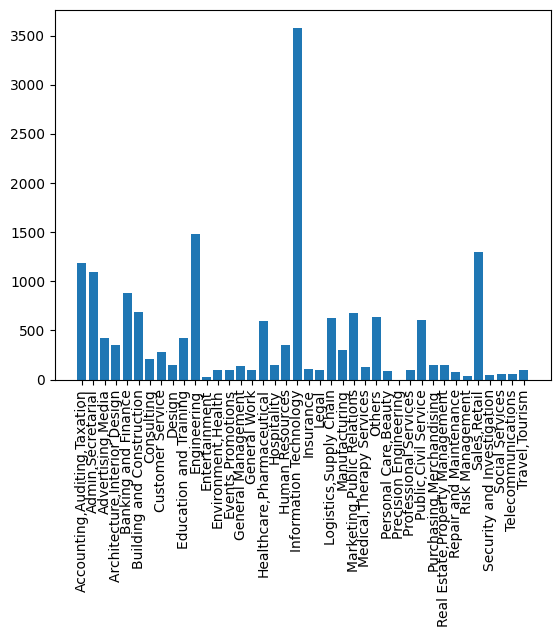

In [50]:
category_counts = [0 for i in range(len(categories_list))]

def count_categories(entry):
    for ind in entry['category_index']:
        category_counts[ind] += 1
    return -1

df_job.apply(count_categories,axis=1)

cat_list_string = [','.join(ele) for ele in categories_list]
print("categories_list:",categories_list)
print("cat_list_string:",cat_list_string)
print("category_counts:",category_counts)

plot = plt.bar(cat_list_string, category_counts)
plt.xticks(rotation='vertical')
plt.show()

## Resumes 

### Create csv dataset

In [12]:

#COORECTED BY HAND: ':::' present in text in 3 resumes

columns = ['path','past_occupations','resume_text']

df_resumes = pd.read_csv('./../data/Dataset_resume_corpus/resume_samples.txt', delimiter=":::",encoding='ANSI', header=None, names=columns)

print("first text to check if utf8 or ANSI\n",df_resumes['resume_text'][0])
df_resumes.head()

C:\Users\Andru\AppData\Local\Temp\ipykernel_15936\1028275158.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_resumes = pd.read_csv('./../data/Dataset_resume_corpus/resume_samples.txt', delimiter=":::",encoding='ANSI', header=None, names=columns)


first text to check if utf8 or ANSI
 Database Administrator <span class="hl">Database</span> <span class="hl">Administrator</span> Database Administrator - Family Private Care LLC Lawrenceville, GA A self-motivated Production SQL Server Database Administrator who possesses  strong analytical and problem solving skills. My experience includes SQL Server  2005, 2008 and 2012, 2014, SSIS, as well as clustering, mirroring, and high  availability solutions in OLTP environments. I am proficient in database backup,  recovery, performance tuning, maintenance tasks, security, and consolidation.  I am confident that I would make a beneficial addition to any company. Over the  course of my career thus far, I have designed databases to fit a variety of needs,  successfully ensured the security of those databases, problem-solved in order to meet  both back-end and front-end needs, installed and tested new versions database  management systems, customized and installed applications and meticulously 

,path,past_occupations,resume_text
0,C:\Workspace\java\scrape_indeed\dba_part_1\1.h...,Database Administrator;Database Administrator;...,"Database Administrator <span class=""hl"">Databa..."
1,C:\Workspace\java\scrape_indeed\dba_part_1\10....,"Database Administrator;SQL, Microsoft PowerPoi...","Database Administrator <span class=""hl"">Databa..."
2,C:\Workspace\java\scrape_indeed\dba_part_1\100...,Oracle Database Administrator;Oracle Database ...,Oracle Database Administrator Oracle <span cla...
3,C:\Workspace\java\scrape_indeed\dba_part_1\100...,Amazon Redshift Administrator and ETL Develope...,Amazon Redshift Administrator and ETL Develope...
4,C:\Workspace\java\scrape_indeed\dba_part_1\100...,Scrum Master;Oracle Database Administrator/ Sc...,Scrum Master Scrum Master Scrum Master Richmon...


In [13]:
df_resumes['skills_required'] = None

df_resumes.info() #-> 3 resumes with no text 

#same rows have only 2 columns in the database and then it is past_occupations that is missing (instead of resume_text)
df_resumes[df_resumes['resume_text'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29783 entries, 0 to 29782
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   path              29783 non-null  object
 1   past_occupations  29783 non-null  object
 2   resume_text       29781 non-null  object
 3   skills_required   0 non-null      object
dtypes: object(4)
memory usage: 930.8+ KB


,path,past_occupations,resume_text,skills_required
6569,C:\Workspace\java\scrape_indeed\it_pm_part_1\1...,I.T. Consultant;I.T. Installation Specialist;P...,None,None
17040,C:\Workspace\java\scrape_indeed\net_admin_part...,Network Administrator;cisco certified CCNA Pro...,None,None


In [14]:
missing_resume_indexes = df_resumes['resume_text'].isnull()
print(missing_resume_indexes.sum(),"True indexes\n",missing_resume_indexes)

df_resumes['resume_text'] = df_resumes['resume_text'].fillna(df_resumes['past_occupations'])


print("df_resumes.loc[missing_resume_indexes]['past_occupations']:\n",df_resumes.loc[missing_resume_indexes]['past_occupations'])
df_resumes.loc[missing_resume_indexes,'past_occupations'] = None

df_resumes[missing_resume_indexes]

2 True indexes
 0        False
1        False
2        False
3        False
4        False
         ...  
29778    False
29779    False
29780    False
29781    False
29782    False
Name: resume_text, Length: 29783, dtype: bool
df_resumes.loc[missing_resume_indexes]['past_occupations']:
 6569     I.T. Consultant;I.T. Installation Specialist;P...
17040    Network Administrator;cisco certified CCNA Pro...
Name: past_occupations, dtype: object


,path,past_occupations,resume_text,skills_required
6569,C:\Workspace\java\scrape_indeed\it_pm_part_1\1...,None,I.T. Consultant;I.T. Installation Specialist;P...,None
17040,C:\Workspace\java\scrape_indeed\net_admin_part...,None,Network Administrator;cisco certified CCNA Pro...,None


In [15]:
#remove the in text labels : <span class="hl"> [WORD] </span>
df_resumes['text'] = df_resumes['resume_text'].apply(lambda row: 
                                                     row.replace("<span class=\"hl\">","").replace("</span>",""))

df_resumes.head()

,path,past_occupations,resume_text,skills_required,text
0,C:\Workspace\java\scrape_indeed\dba_part_1\1.h...,Database Administrator;Database Administrator;...,"Database Administrator <span class=""hl"">Databa...",None,Database Administrator Database Administrator ...
1,C:\Workspace\java\scrape_indeed\dba_part_1\10....,"Database Administrator;SQL, Microsoft PowerPoi...","Database Administrator <span class=""hl"">Databa...",None,Database Administrator Database Administrator ...
2,C:\Workspace\java\scrape_indeed\dba_part_1\100...,Oracle Database Administrator;Oracle Database ...,Oracle Database Administrator Oracle <span cla...,None,Oracle Database Administrator Oracle Database ...
3,C:\Workspace\java\scrape_indeed\dba_part_1\100...,Amazon Redshift Administrator and ETL Develope...,Amazon Redshift Administrator and ETL Develope...,None,Amazon Redshift Administrator and ETL Develope...
4,C:\Workspace\java\scrape_indeed\dba_part_1\100...,Scrum Master;Oracle Database Administrator/ Sc...,Scrum Master Scrum Master Scrum Master Richmon...,None,Scrum Master Scrum Master Scrum Master Richmon...


### PREPROCESSING to resumes

In [16]:
#APPLY PREPROCESSING TO RESUME TEXT
#    (the job ads were already preprocessed and cleaned)

#CLEAN "escape chraracters": \xa0
#TODO: "\xa0" IS NOW IN TEXT RESUME: strings = strings.apply(lambda string: return string.replace(u’\xa0’, u’ ‘)
from preprocessor import EnglishPreProcessor

print("PREPROCESSING")
print("BEFORE:",df_resumes['text'].iloc[0])

df_resumes_preprocessed = pd.DataFrame()


preprocessor = EnglishPreProcessor()
#in preprocessor.py:
#    - lower case -> DONE
#    - remove punctuation -> DONE
#    - remove special characters -> DONE
#    - remove extra spaces -> DONE
#    - remove stop words -> TODO TODOOOOOOOOOO (there is a stopwords_path in the EnglishPreProcessor)
#    - remove rare waors -> TODO TODOOOOOOOOOO (should look into pybert.io.vocabulary.py)

df_resumes_preprocessed['text'] = df_resumes['text'].apply(lambda row: preprocessor(row))
df_resumes_preprocessed['skills_required'] = df_resumes['skills_required']


print("AFTER:",df_resumes_preprocessed['text'].iloc[0])


PREPROCESSING
BEFORE: Database Administrator Database Administrator Database Administrator - Family Private Care LLC Lawrenceville, GA A self-motivated Production SQL Server Database Administrator who possesses  strong analytical and problem solving skills. My experience includes SQL Server  2005, 2008 and 2012, 2014, SSIS, as well as clustering, mirroring, and high  availability solutions in OLTP environments. I am proficient in database backup,  recovery, performance tuning, maintenance tasks, security, and consolidation.  I am confident that I would make a beneficial addition to any company. Over the  course of my career thus far, I have designed databases to fit a variety of needs,  successfully ensured the security of those databases, problem-solved in order to meet  both back-end and front-end needs, installed and tested new versions database  management systems, customized and installed applications and meticulously  monitored performance for the smoothest front-end experience p

#stopword
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

words = [word for word in words if word not in set(stopwords.words('english'))]

In [17]:
#df_resumes[['text', 'skills_required']].to_json('resumes_dataset.json', orient='records')

df_resumes_preprocessed[['text', 'skills_required']].to_csv('resumes_dataset.csv')

In [18]:
df_resumes[['text', 'skills_required']].to_csv('resumes_raw_dataset.csv')